# K-means 군집분석

In [57]:
import pandas as pd
import numpy as np

np.random.seed(42)

from matplotlib import pyplot
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import scipy as sp
import seaborn as sns

from sklearn.decomposition import PCA 

mpl.rcParams['axes.unicode_minus'] = False
mpl.rc("font", family = "Malgun Gothic")

In [58]:
title_size = 15
figure_size = (12 , 7)

# 데이터 전처리

In [59]:
df_raw = pd.read_csv("./공원_고령인구_병합데이터.csv", encoding = "utf-8")
df_raw.head(2)

,PARK_SN,공원명,행정동,x,y,면적,공공시설_개수,노인및사회복지시설_개수,문화및집회시설_개수,영유아시설_개수,...,행정동 독거노인수,행정동 독거노인비율,행정동 독거노인밀도,기초생활수급자 고령인구수 (생계/주거/의료),기초생활수급자 고령인구밀도 (생계/주거/의료),최근접_지하철역사 (m),최근접_버스정류소 (m),최근접_주차장 (m),최근접_노인사회복지시설 (m),최근접_의료시설 (m)
0,1,NaN,가양1동,126.847068,37.570200,1510,3,5,8,5,...,539,0.02,114.68,83,17.66,516.999156,86.850720,1539.445721,174.319786,337.948734
1,2,엄지공원,가양2동,126.854735,37.565807,1510,6,5,2,5,...,1690,0.12,1690.00,1673,1673.00,477.255380,138.307996,1375.251732,205.503051,446.820272


In [65]:
df_raw[df_raw['PARK_SN'] == 39]

,PARK_SN,공원명,행정동,x,y,면적,공공시설_개수,노인및사회복지시설_개수,문화및집회시설_개수,영유아시설_개수,...,행정동 독거노인수,행정동 독거노인비율,행정동 독거노인밀도,기초생활수급자 고령인구수 (생계/주거/의료),기초생활수급자 고령인구밀도 (생계/주거/의료),최근접_지하철역사 (m),최근접_버스정류소 (m),최근접_주차장 (m),최근접_노인사회복지시설 (m),최근접_의료시설 (m)
36,39,달빛공원,화곡4동,126.862945,37.531198,973,8,30,4,44,...,903,0.04,1101.22,400,487.8,1447.510241,86.449227,227.224985,299.482427,47.283348


In [10]:
df = df_raw.copy()

In [11]:
df_all = df.drop(["행정동",'공원명','x','y', 'PARK_SN'], axis=1)

In [12]:
df_counting = df.loc[:, df.columns.str.contains('개수')]
df_distance = df.loc[:, df.columns.str.contains('최근접')]
df_elder = df.loc[:, (~df.columns.str.contains('개수')) & (~df.columns.str.contains('최근접'))]\
    .drop(["행정동",'공원명','x','y', 'PARK_SN'], axis=1) # 불필요한 컬럼 제거

In [13]:
df_counting.tail(2)

,공공시설_개수,노인및사회복지시설_개수,문화및집회시설_개수,영유아시설_개수,운동시설_개수,의료시설_개수,의원_개수,제1종근린생활시설_개수,제2종근린생활시설_개수,주거_개수,주차장_개수,치안안전시설_개수,판매및영업시설_개수,학군_개수,화장실_개수
104,2,3,13,3,1,1,1,57,72,294,0,7,10,38,6
105,6,5,11,5,4,3,1,77,77,449,0,7,5,84,4


In [14]:
df_distance.tail(2)

,최근접_지하철역사 (m),최근접_버스정류소 (m),최근접_주차장 (m),최근접_노인사회복지시설 (m),최근접_의료시설 (m)
104,460.306349,154.375870,1563.725685,377.742864,184.695105
105,380.067832,66.418356,1214.910969,2.716621,249.526913


In [15]:
df_elder.tail(2)

,면적,행정동 인구 (명),행정동 면적 (㎢),행정동 인구밀도 (명/㎢),행정동 고령인구수,행정동 고령인구비율,행정동 고령인구밀도,행정동 독거노인수,행정동 독거노인비율,행정동 독거노인밀도,기초생활수급자 고령인구수 (생계/주거/의료),기초생활수급자 고령인구밀도 (생계/주거/의료)
104,1499,34359,4.7,7310,3106,0.09,660.85,539,0.02,114.68,83,17.66
105,1499,13902,1.0,13902,4083,0.29,4083.00,1690,0.12,1690.00,1673,1673.00


# PCA X, Y, Z

In [16]:

pca = PCA(n_components=1)
pca.fit(df_counting)
x_pca = pca.transform(df_counting)

In [17]:
pca = PCA(n_components=1)
pca.fit(df_distance)
y_pca = pca.transform(df_distance)

In [18]:
pca = PCA(n_components=1)
pca.fit(df_elder)
z_pca = pca.transform(df_elder)

In [19]:
mean_v, std_v = x_pca.mean(), x_pca.std()
x_pca = (x_pca - mean_v) / std_v

In [20]:
mean_v, std_v = y_pca.mean(), y_pca.std()
y_pca = (y_pca - mean_v) / std_v

In [21]:
mean_v, std_v = z_pca.mean(), z_pca.std()
z_pca = (z_pca - mean_v) / std_v

# K-means elbow 시각화

c:\tools\Anaconda3\envs\aivle\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\tools\Anaconda3\envs\aivle\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\tools\Anaconda3\envs\aivle\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\tools\Anaconda3\envs\aivle\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a m

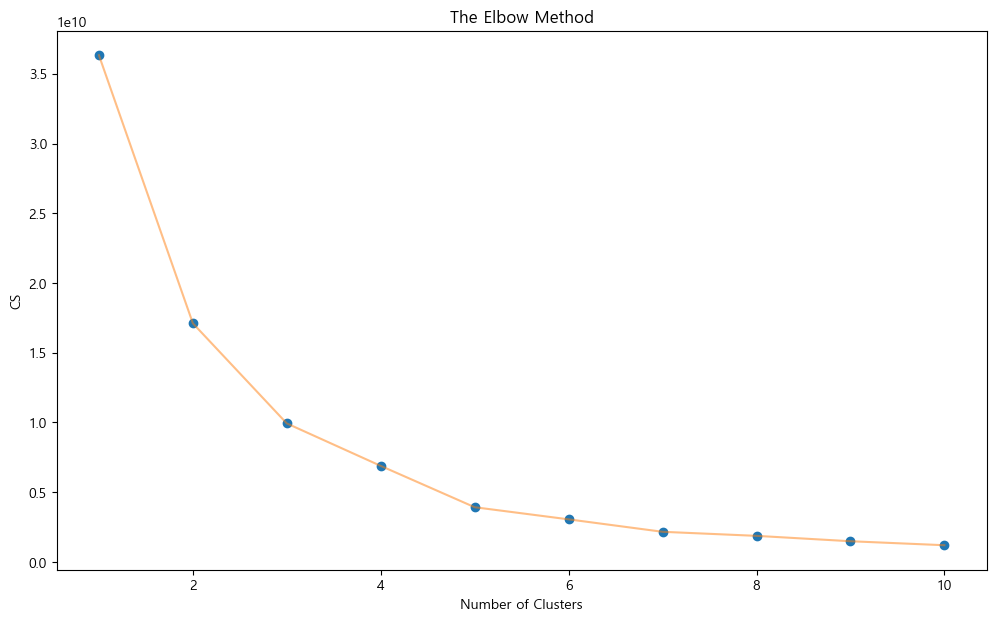

In [22]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(df_all)
    cs.append(kmeans.inertia_)

plt.figure(figsize=figure_size)
plt.plot(range(1, 11) , cs , 'o')
plt.plot(range(1, 11) , cs , '-' , alpha = 0.5)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters') , plt.ylabel('CS')
plt.savefig(f'../img/pca, kmeans/The Elbow Method.png')
plt.show()

C:\Users\kimyoo\AppData\Local\Temp\ipykernel_4300\1887506621.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="건물용도별 개수", y="건물용도별 최단거리", data=df_xy, palette="Set2")


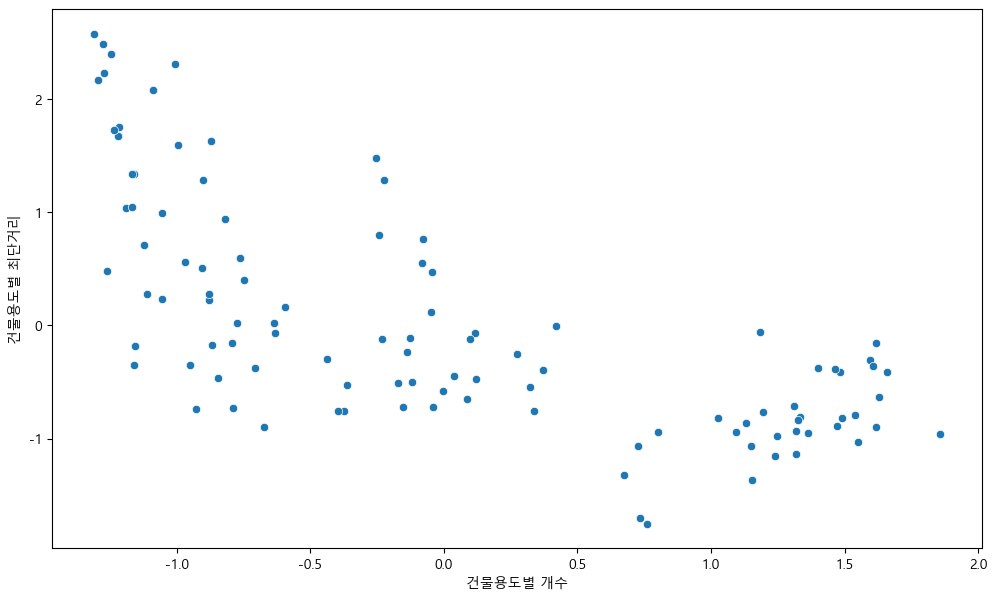

In [23]:
df_xy = pd.DataFrame({'건물용도별 개수':x_pca.squeeze(), '건물용도별 최단거리':y_pca.squeeze()})

plt.figure(figsize=figure_size)
sns.scatterplot(x="건물용도별 개수", y="건물용도별 최단거리", data=df_xy, palette="Set2")
plt.savefig(f'../img/pca, kmeans/건물용도별 개수와 최단거리 pca - scatterplot.png')
plt.show()

C:\Users\kimyoo\AppData\Local\Temp\ipykernel_4300\1697875414.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="건물용도별 개수", y="고령인구 데이터", data=df_xz, palette="Set2")


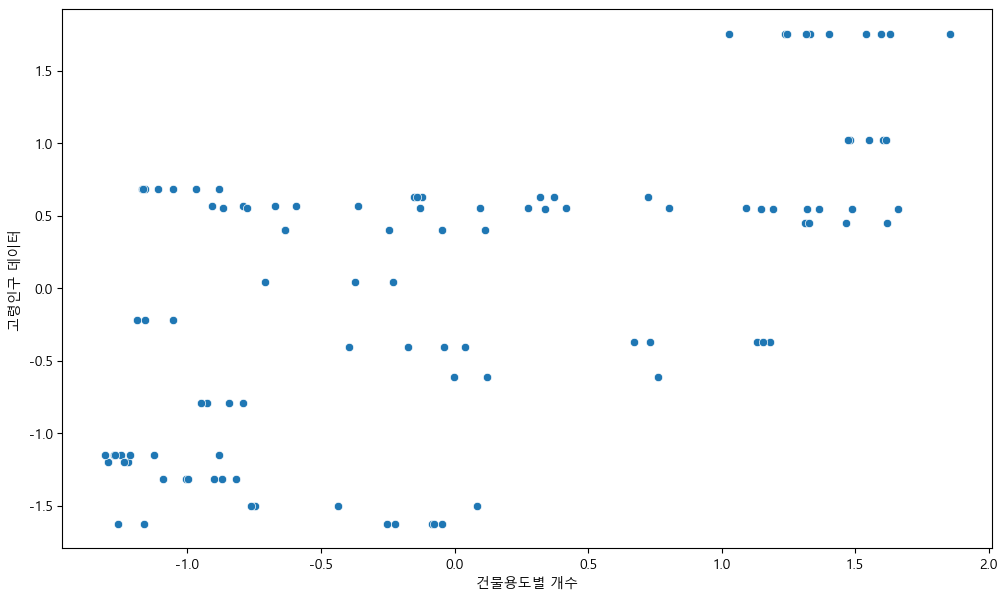

In [24]:
df_xz = pd.DataFrame({'건물용도별 개수':x_pca.squeeze(), '고령인구 데이터':z_pca.squeeze()})

plt.figure(figsize=figure_size)
sns.scatterplot(x="건물용도별 개수", y="고령인구 데이터", data=df_xz, palette="Set2")
plt.savefig(f'../img/pca, kmeans/건물용도별 개수와 고령인구 데이터 pca - scatterplot.png')
plt.show()

C:\Users\kimyoo\AppData\Local\Temp\ipykernel_4300\654514749.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="건물용도별 최단거리", y="고령인구 데이터", data=df_yz, palette="Set2")


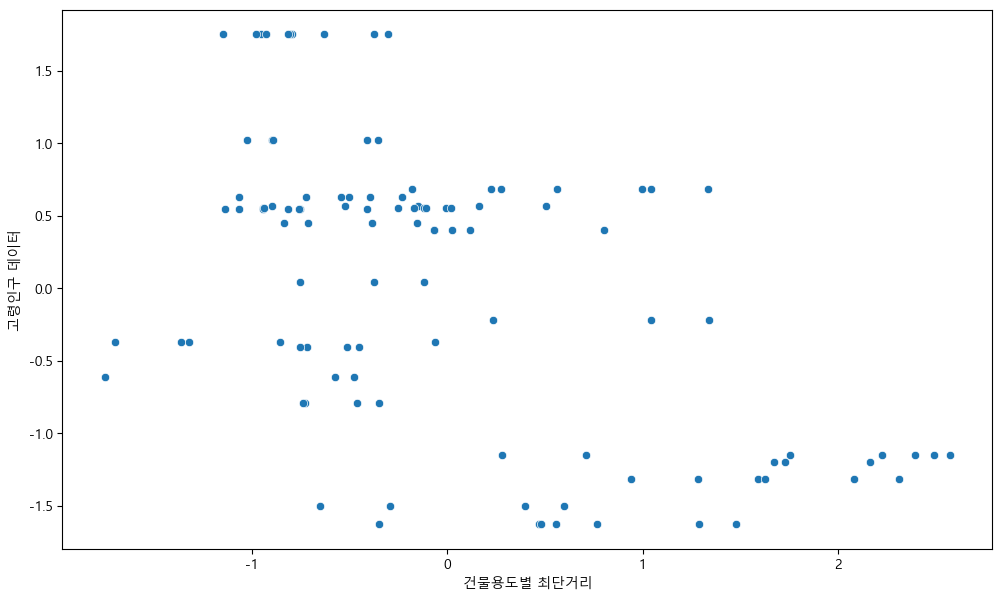

In [25]:
df_yz = pd.DataFrame({'건물용도별 최단거리':y_pca.squeeze(), '고령인구 데이터':z_pca.squeeze()})

plt.figure(figsize=figure_size)
sns.scatterplot(x="건물용도별 최단거리", y="고령인구 데이터", data=df_yz, palette="Set2")
plt.savefig(f'../img/pca, kmeans/건물용도별 최단거리와 고령인구 데이터 pca - scatterplot.png')
plt.show()

C:\Users\kimyoo\AppData\Local\Temp\ipykernel_4300\1697875414.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="건물용도별 개수", y="고령인구 데이터", data=df_xz, palette="Set2")


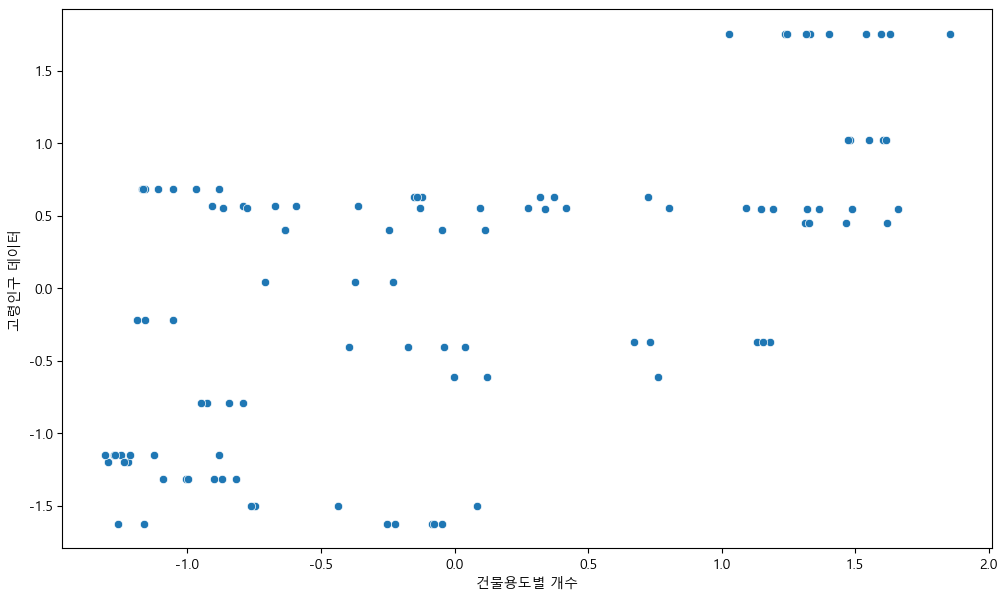

In [26]:
df_xz = pd.DataFrame({'건물용도별 개수':x_pca.squeeze(), '고령인구 데이터':z_pca.squeeze()})

plt.figure(figsize=figure_size)
sns.scatterplot(x="건물용도별 개수", y="고령인구 데이터", data=df_xz, palette="Set2")
plt.savefig(f'../img/pca, kmeans/건물용도별 개수와 고령인구 데이터 pca - scatterplot.png')
plt.show()

In [27]:
df_3d = pd.DataFrame({'건물용도별 개수':x_pca.squeeze(),
                      '건물용도별 최단거리':y_pca.squeeze(),
                      '고령인구 데이터':z_pca.squeeze()})

In [28]:
kmeans = (KMeans(n_clusters = 5 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
kmeans.fit(df_3d)
labels3 = kmeans.labels_
centroids3 = kmeans.cluster_centers_

y_kmeans = kmeans.fit_predict(df_3d)
df_3d['cluster'] = pd.DataFrame(y_kmeans)
df_3d.head()

,건물용도별 개수,건물용도별 최단거리,고령인구 데이터,cluster
0,-1.275210,2.491306,-1.153735,3
1,-1.296283,2.165098,-1.199835,3
2,-1.220631,1.673185,-1.199853,3
3,-1.190050,1.042507,-0.222131,2
4,-1.160148,1.341873,-0.222171,2


In [34]:
# !pip install nbformat
# !pip install plotly

!pip install ipykernel
!pip install --upgrade nbformat

In [37]:
import plotly as py
import plotly.graph_objs as go

trace1 = go.Scatter3d(
    x= df_3d['건물용도별 개수'],
    y= df_3d['건물용도별 최단거리'],
    z= df_3d['고령인구 데이터'],
    mode='markers',
     marker=dict(
        color = df_3d['cluster'], 
        size= 6,
        line=dict(
            color= df_3d['cluster'],
            width= 12
        ),
        opacity=0.8
     )
)
data = [trace1]
layout = go.Layout(
    title= '3차원 k-means clustering',
    scene = dict(
            xaxis = dict(title  = '건물용도별 개수'),
            yaxis = dict(title  = '건물용도별 최단거리'),
            zaxis = dict(title  = '고령인구 데이터')
        )
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

# K-means 2차원

In [52]:
from sklearn.cluster import KMeans 

# k-means clustering 실행
kmeans = KMeans(n_clusters=3)
kmeans.fit(df_yz)

# 결과 확인
result_by_sklearn = df_yz.copy()
result_by_sklearn["cluster"] = kmeans.labels_
result_by_sklearn.head()

c:\tools\Anaconda3\envs\aivle\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\tools\Anaconda3\envs\aivle\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



,건물용도별 최단거리,고령인구 데이터,cluster
0,2.491306,-1.153735,1
1,2.165098,-1.199835,1
2,1.673185,-1.199853,1
3,1.042507,-0.222131,1
4,1.341873,-0.222171,1


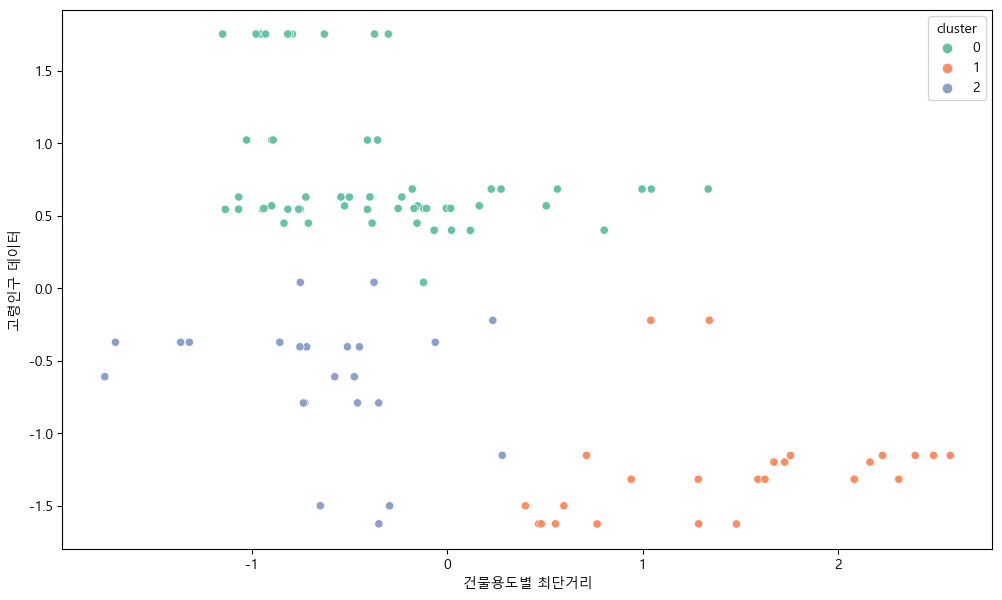

In [56]:
plt.figure(figsize=figure_size)
sns.scatterplot(x="건물용도별 최단거리", y="고령인구 데이터", hue="cluster", data=result_by_sklearn, palette="Set2")
plt.savefig(f'../img/pca, kmeans/건물용도별 최단거리와 고령인구 데이터 pca - 3 n_cluster.png')
plt.show()

In [41]:
from sklearn.cluster import KMeans 

# k-means clustering 실행
kmeans = KMeans(n_clusters=3)
kmeans.fit(df_xz)

# 결과 확인
result_by_sklearn = df_xz.copy()
result_by_sklearn["cluster"] = kmeans.labels_
result_by_sklearn.head()

c:\tools\Anaconda3\envs\aivle\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\tools\Anaconda3\envs\aivle\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



,건물용도별 개수,고령인구 데이터,cluster
0,-1.275210,-1.153735,0
1,-1.296283,-1.199835,0
2,-1.220631,-1.199853,0
3,-1.190050,-0.222131,2
4,-1.160148,-0.222171,2


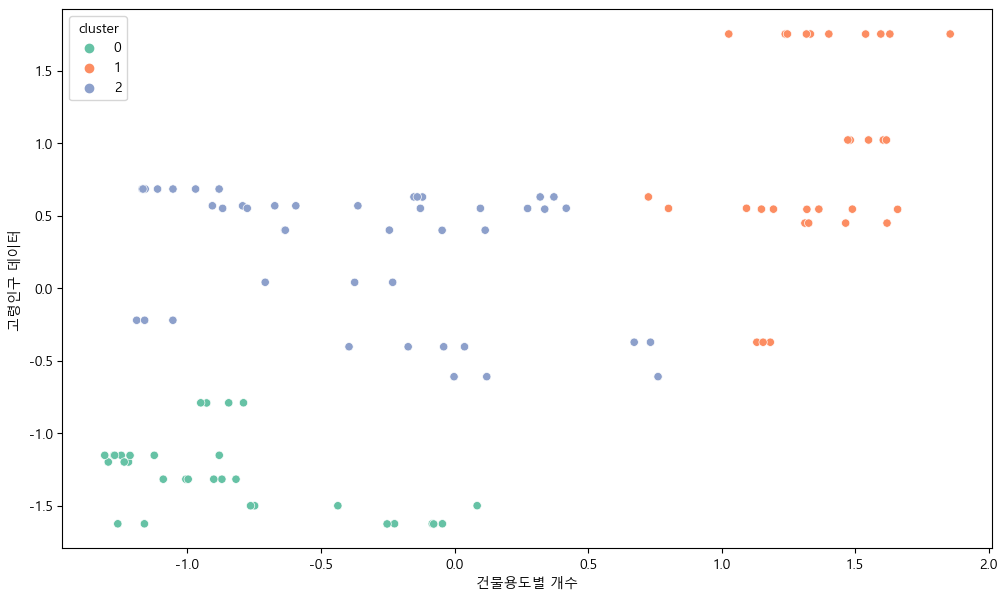

In [42]:
plt.figure(figsize=figure_size)
sns.scatterplot(x="건물용도별 개수", y="고령인구 데이터", hue="cluster", data=result_by_sklearn, palette="Set2")
plt.savefig(f'../img/pca, kmeans/건물용도별 최단거리와 고령인구 데이터 pca - 3 n_cluster.png')
plt.show()

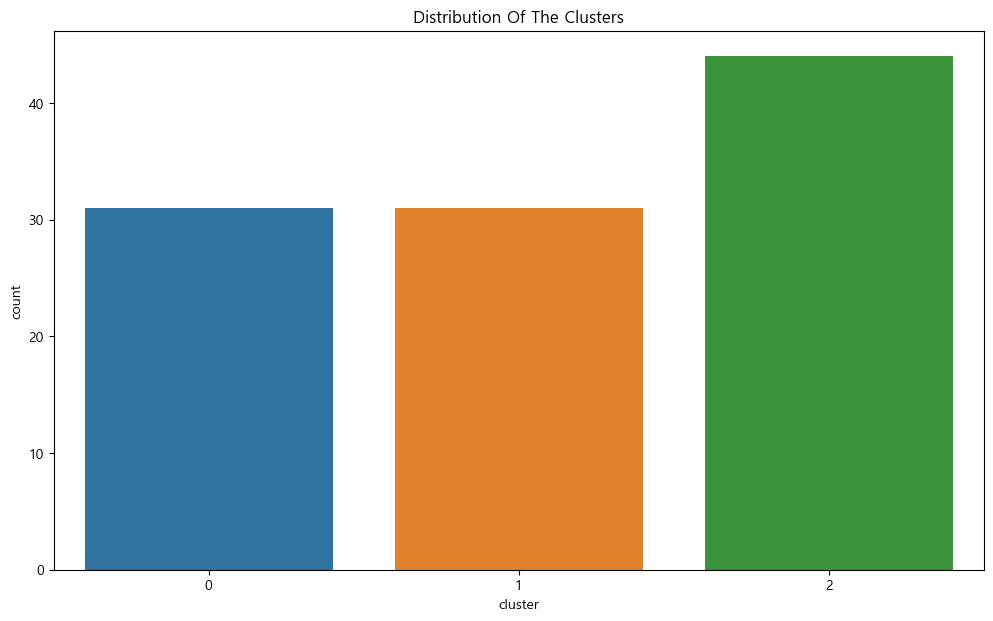

In [ ]:
plt.figure(figsize=figure_size)
sns.countplot(x=result_by_sklearn["cluster"])
plt.title("Distribution Of The Clusters")
plt.savefig(f'../img/pca, kmeans/건물용도별 최단거리와 고령인구 데이터 pca - Distribution Of The Clusters.png')
plt.show()

# Agglomerative Hierarchical Clustering
- hierarchy.dendrogram

In [ ]:
df_xy['PARK_SN'] = df_raw['PARK_SN']

In [ ]:
df_xy

,건물용도별 개수,건물용도별 최단거리,PARK_SN
0,-1.275210,2.491306,1
1,-1.296283,2.165098,2
2,-1.220631,1.673185,3
3,-1.190050,1.042507,4
4,-1.160148,1.341873,5
...,...,...,...
101,1.472527,-0.891872,133
102,-0.906571,0.506729,134
103,1.246380,-0.979778,135
104,-1.309579,2.576147,137


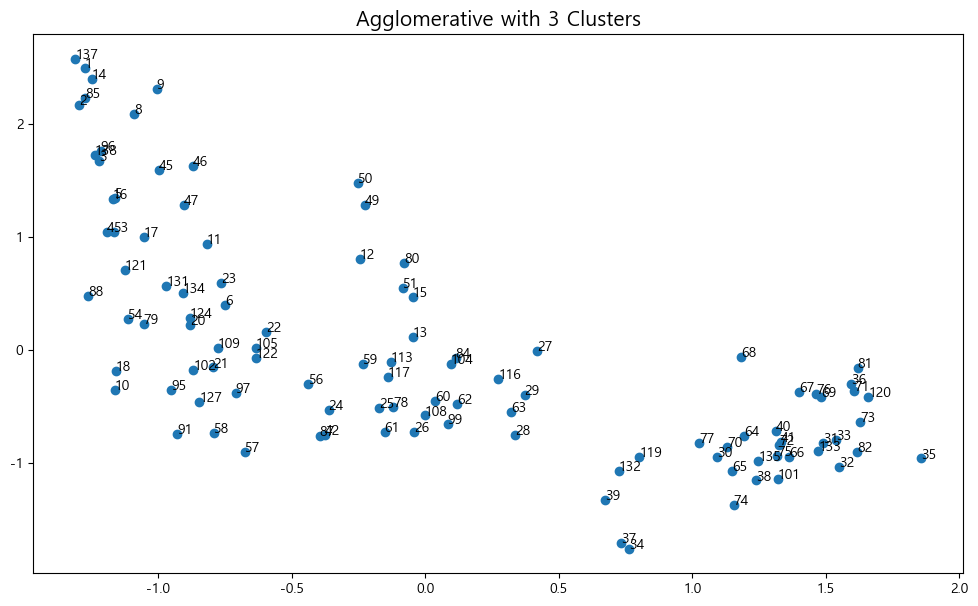

In [ ]:
from sklearn.cluster import AgglomerativeClustering 

n = 3
agglom = AgglomerativeClustering(n_clusters=n, linkage='average').fit(df_xy)

df_xy['Labels'] = agglom.labels_
fig, ax = plt.subplots(figsize=figure_size)
ax.scatter(x=df_xy['건물용도별 개수'], y=df_xy['건물용도별 최단거리'], 
               )
for i, txt in enumerate(df_xy['PARK_SN']):
    ax.annotate(txt, (df_xy['건물용도별 개수'][i], df_xy['건물용도별 최단거리'][i]))
    
plt.title(f'Agglomerative with {n} Clusters', size=title_size)
plt.savefig(f'../img/pca, kmeans/건물용도별 최단거리와 고령인구 데이터 pca - Agglomerative with {n} Clusters.png')
plt.show()

C:\Users\yookim\AppData\Local\Temp\ipykernel_14016\2300599954.py:8: UserWarning:

The palette list has more values (5) than needed (3), which may not be intended.



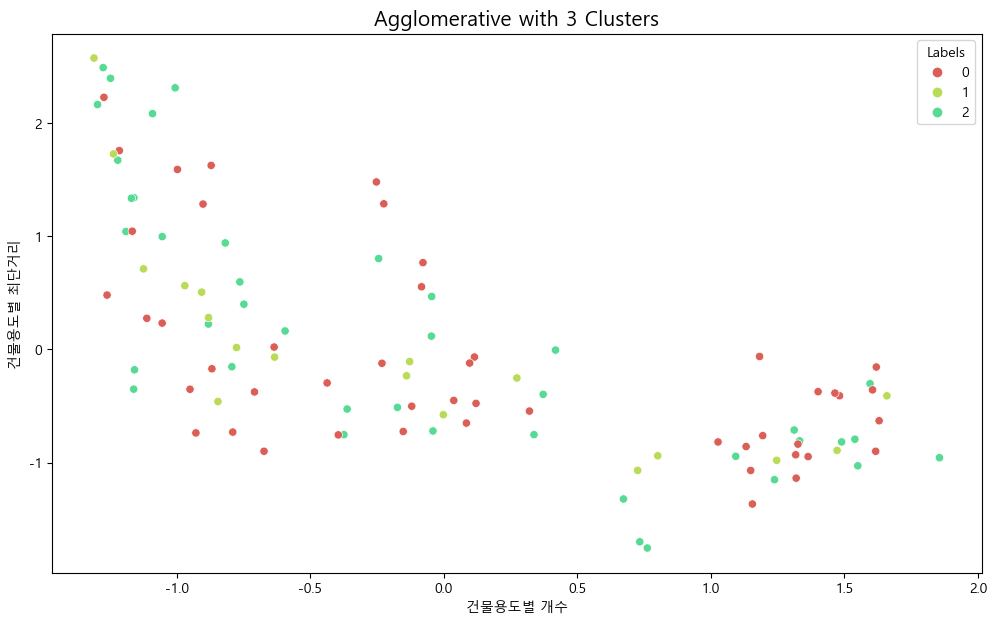

In [ ]:
from sklearn.cluster import AgglomerativeClustering 

n = 3
agglom = AgglomerativeClustering(n_clusters=n, linkage='average').fit(df_xy)

df_xy['Labels'] = agglom.labels_
plt.figure(figsize=figure_size)
sns.scatterplot(x='건물용도별 개수', y='건물용도별 최단거리', data=df_xy, hue=df_xy['Labels'],
                palette=sns.color_palette('hls', 5))
plt.title(f'Agglomerative with {n} Clusters', size=title_size)
plt.savefig(f'../img/pca, kmeans/건물용도별 최단거리와 고령인구 데이터 pca - Agglomerative with {n} Clusters.png')
plt.show()

In [ ]:
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 

In [ ]:
df_xy.drop('Labels', axis=1, inplace=True)

In [ ]:
dist = distance_matrix(df_xy, df_xy)
print(np.round(dist, 10))

[[0.         0.32688813 0.81994036 ... 4.29031928 0.09153784 0.76417839]
 [0.32688813 0.         0.49769711 ... 4.04417875 0.41126361 0.44104383]
 [0.81994036 0.49769711 0.         ... 3.62275448 0.9073328  0.05721388]
 ...
 [4.29031928 4.04417875 3.62275448 ... 0.         4.37921539 3.67399156]
 [0.09153784 0.41126361 0.9073328  ... 4.37921539 0.         0.85117423]
 [0.76417839 0.44104383 0.05721388 ... 3.67399156 0.85117423 0.        ]]


In [ ]:
Z = hierarchy.linkage(dist, 'complete')

C:\Users\yookim\AppData\Local\Temp\ipykernel_14016\3045749611.py:1: ClusterWarning:

scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix



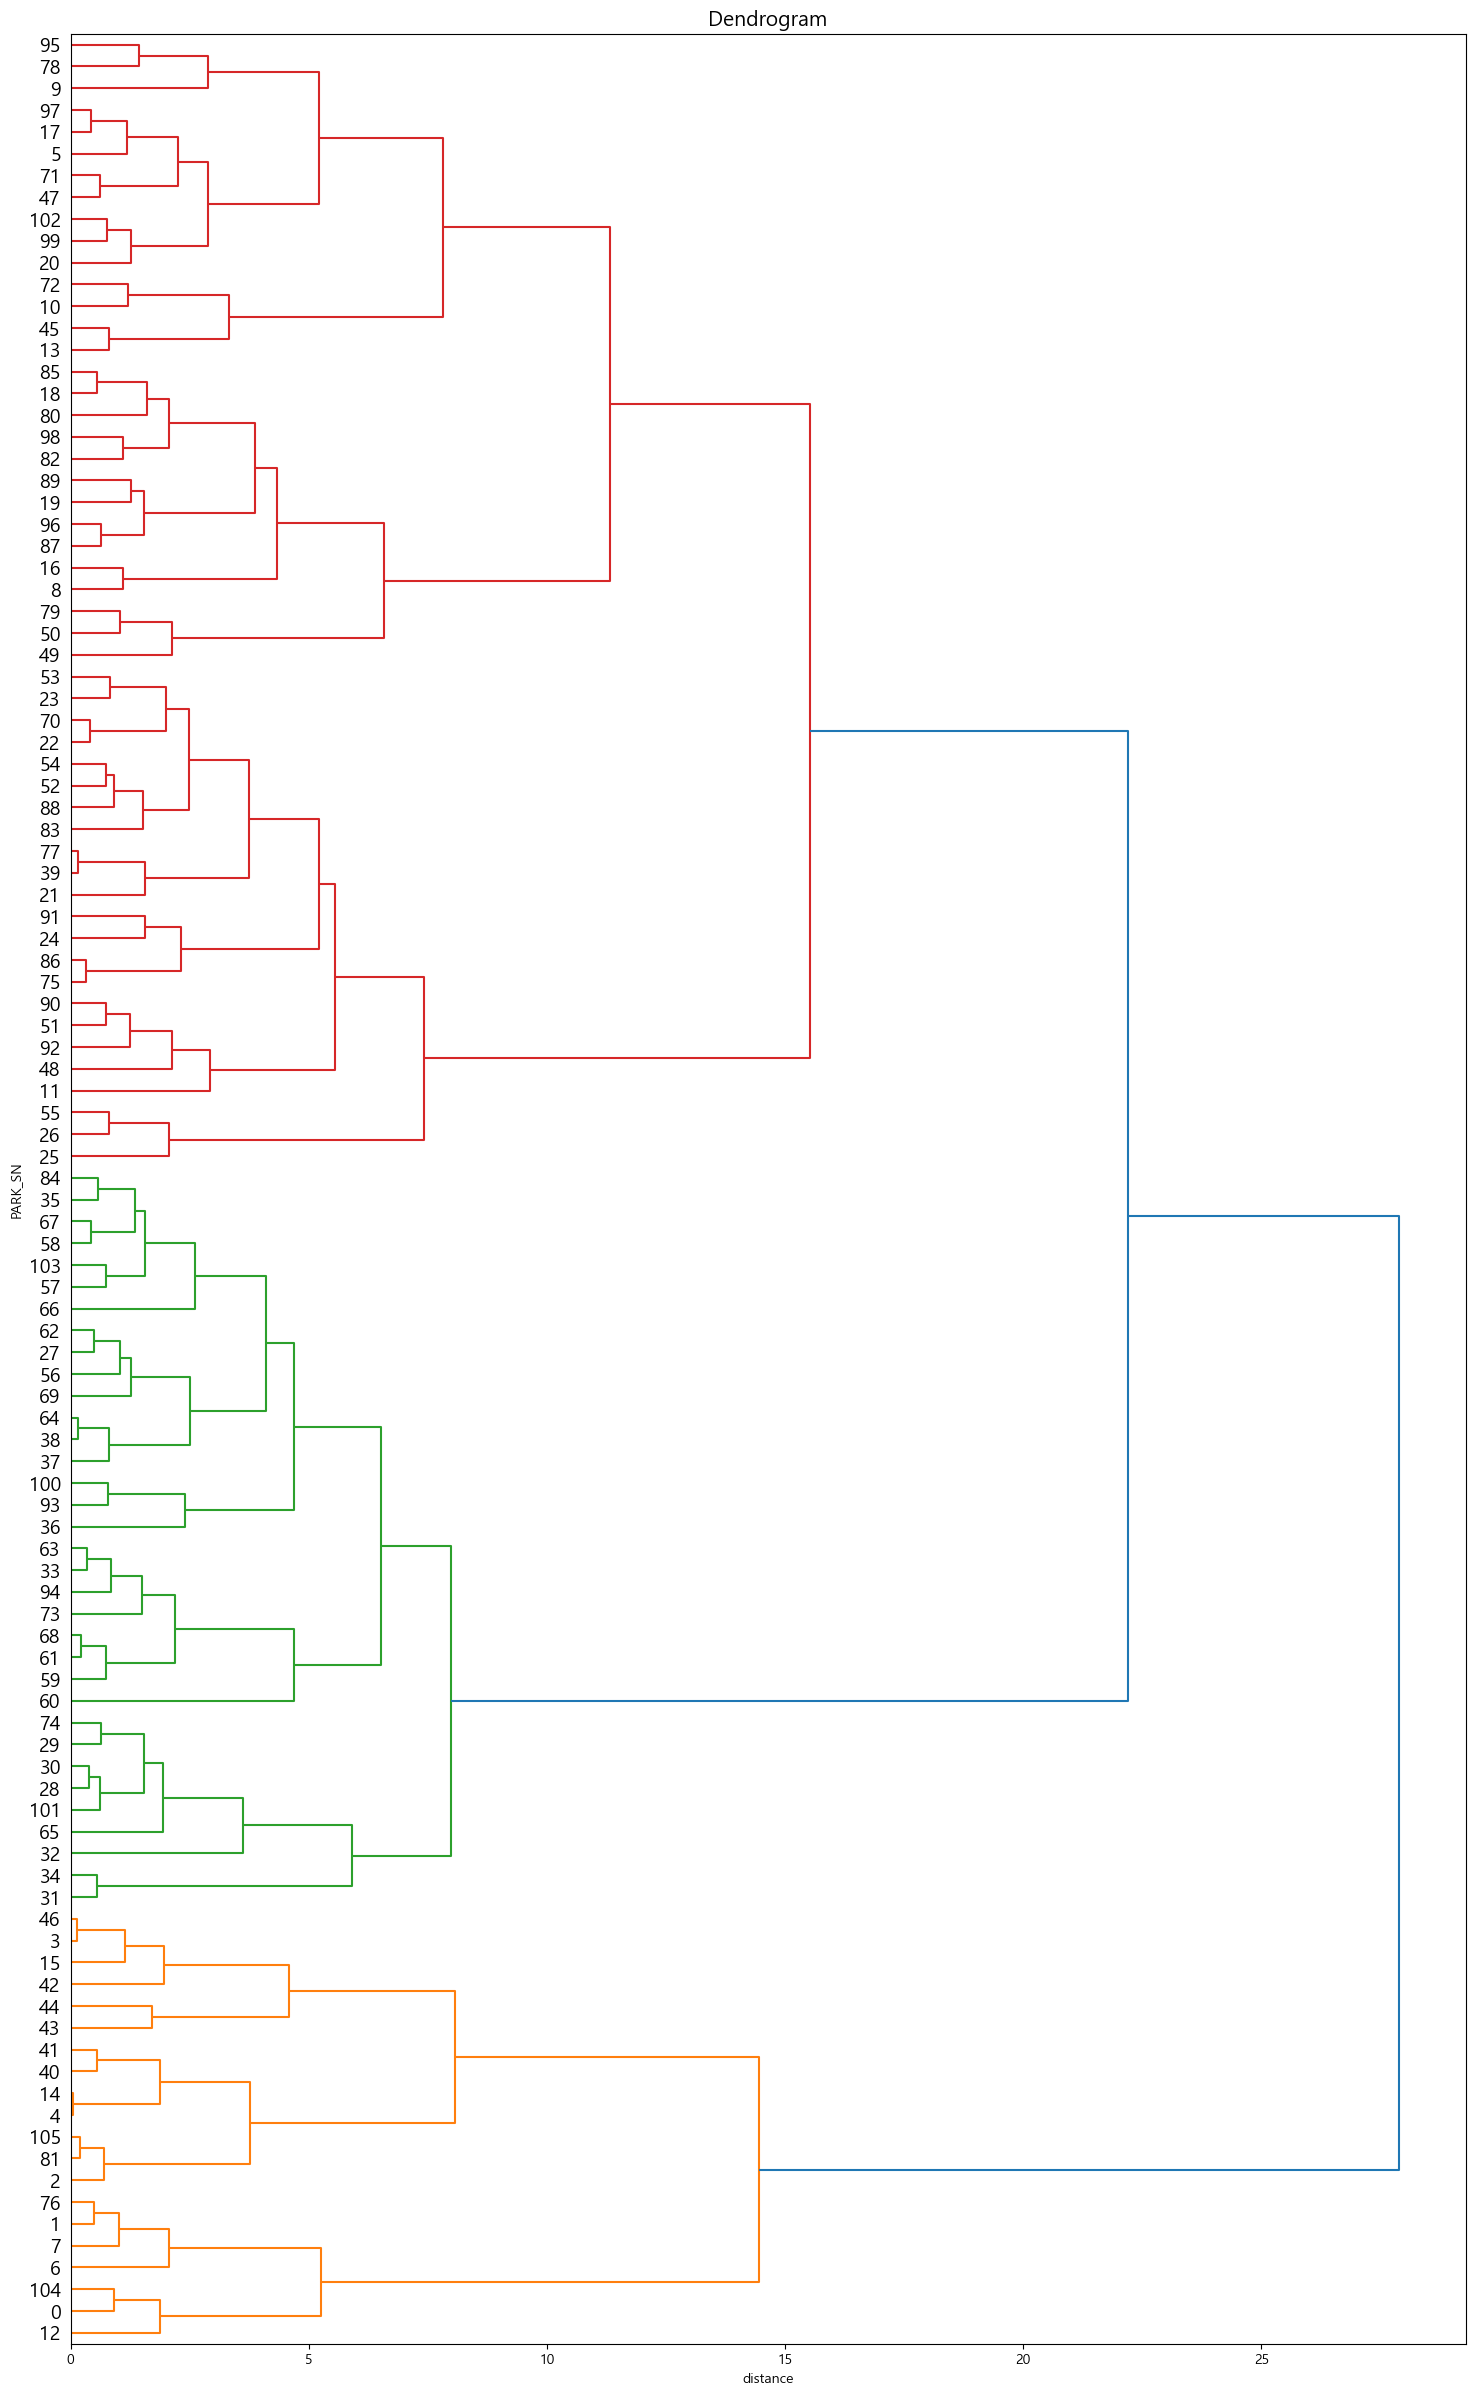

In [ ]:
plt.figure(figsize=(18, 30))
dendro = hierarchy.dendrogram(Z, leaf_rotation=0, leaf_font_size=14, orientation='right')
plt.title(f'Dendrogram', size=title_size)
plt.xlabel('distance')
plt.ylabel('PARK_SN')
plt.savefig(f'../img/pca, kmeans/Dendrogram.png')
plt.show()